# Neural Network image recognition, MNIST Fashion dataset

In [255]:
import pandas as pd     # dataframes
import numpy as np      # numbers and arrays 
import matplotlib.pyplot as plt  # plotting
from sklearn import datasets     
from sklearn.model_selection import train_test_split

### Load fashion Data 

In [256]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.datasets import fashion_mnist as fashion_mnist

In [257]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data() # don't forget to shuffle training and testing data !

In [258]:
X_max=np.concatenate((X_train_full,X_test),axis=0)
X_max.shape

(70000, 28, 28)

In [259]:
y_max=np.concatenate((y_train_full,y_test),axis=0)
y_max.shape

(70000,)

In [260]:
X_train=X_max[10000:]
#X_test=X_max[:10000]
X_train_full.shape

(60000, 28, 28)

In [261]:
y_train=y_max[10000:]
#y_test=y_max[:10000]
y_train_full.shape

(60000,)

In [262]:
X_test.shape

(10000, 28, 28)

In [263]:
X_train_full.shape

(60000, 28, 28)

### plot an image

In [264]:
X_train_full[1,:,:]
type(X_train_full[1,1,1])
X_train_full.dtype

dtype('uint8')

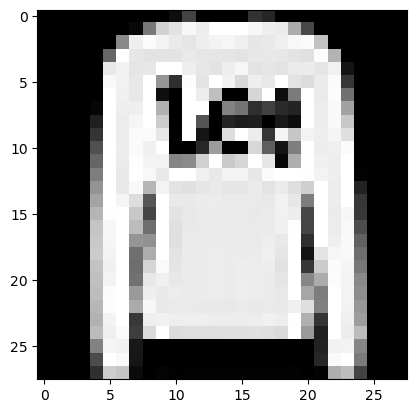

In [265]:
image=X_train_full[0,:,:]
image=X_test[1]
plt.imshow(image,cmap='gray')
plt.show()

In [266]:
y_train_full[4]

0

In [267]:
class_names=["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#type(class_names)

In [268]:
class_names[y_train_full[0]]

'Ankle boot'

### normalize pixels to 0-1 (also get floats) and make a validation set

In [269]:
X_valid=X_train_full[:5000]/255.0  # first 5000 instances of X_train_full
X_train=X_train_full[5000:]/255.0 
y_valid=y_train_full[:5000]  # first 5000 instances of y_train_full
y_train=y_train_full[5000:] 
X_test=X_test/255.0

In [270]:
#X_test[0]
y_train.shape

(55000,)

In [271]:
#X_train_full[4999]

In [272]:
y_test.shape

(10000,)

In [273]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [274]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 300)               235500    
                                                                 
 dense_33 (Dense)            (None, 100)               30100     
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [275]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [279]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8667 - val_loss: 0.3783 - val_accuracy: 0.8680
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3634 - accuracy: 0.8703 - val_loss: 0.3714 - val_accuracy: 0.8696
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8749 - val_loss: 0.3526 - val_accuracy: 0.8756
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3413 - accuracy: 0.8779 - val_loss: 0.4062 - val_accuracy: 0.8504
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3308 - accuracy: 0.8805 - val_loss: 0.3574 - val_accuracy: 0.8782


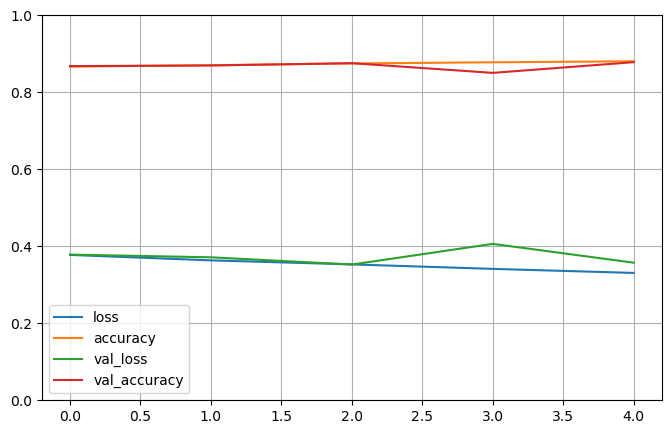

In [280]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [281]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.3879 - accuracy: 0.8638


[0.3878987431526184, 0.8637999892234802]

confusion matrix
plot neural network and get weights and constant values
look for most significant feature
only predict on 'safe' predictions, probabillity